In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import scipy.stats as stats

In [54]:
df = pd.read_csv(r'C:/Users/pbann/Downloads/Algerian_forest_fires_dataset_UPDATE.csv',skiprows=1)

In [55]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [56]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [57]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [58]:
df.drop(167,axis=0,inplace=True)

In [59]:
df.drop(122,axis=0,inplace=True)

In [60]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [61]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [62]:
df.plot(kind = 'box',figsize = (20,10),color = {'boxes':'g','whiskers' : 'r'})

TypeError: no numeric data to plot

In [63]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [64]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [65]:
df.rename(columns={'Classes  ':'classes',' RH':'RH',' Ws':'Ws','Rain ':'Rain'},inplace=True)

# as this row is just column name so it is of no use so dropped the data

In [66]:
df.drop(123,axis=0,inplace=True)

In [69]:
df['Temperature']=df['Temperature'].astype(int)
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)


In [ ]:
[for feature in df.columns ]

In [70]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
classes         object
dtype: object

In [72]:
df['classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [73]:
df['classes']=df['classes'].map({'not fire   ':0, 'fire   ':1, 'fire':1, 'fire ':1, 'not fire':0, 'not fire ':0,
       'not fire     ':0, 'not fire    ':0})

In [74]:
df['classes'].unique()

array([0, 1], dtype=int64)

In [75]:
fire = df[df['classes']==1]
fire=fire.iloc[:,3:6]

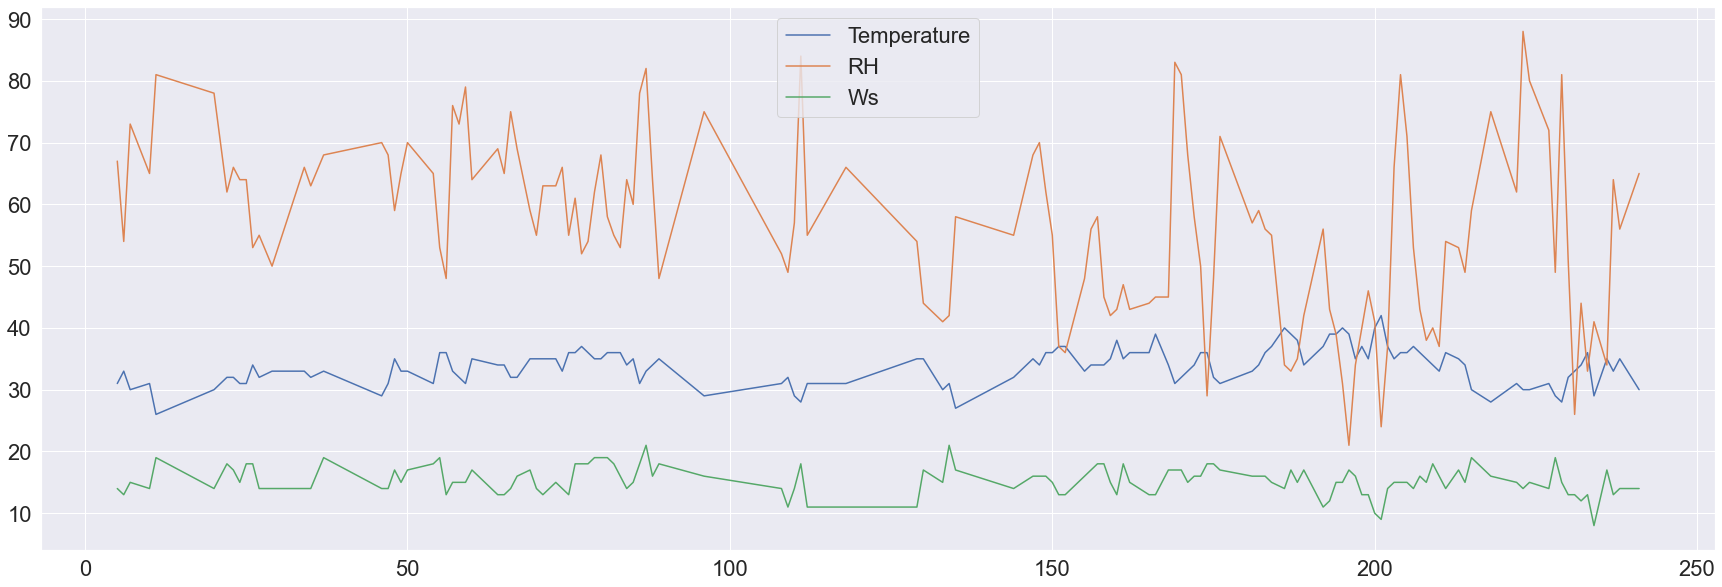

In [84]:
fire.plot(figsize=(30,10))
sns.set(font_scale=2)

In [212]:
df1=df.loc[0:121]
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0


In [187]:
df2=df.loc[122::]
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


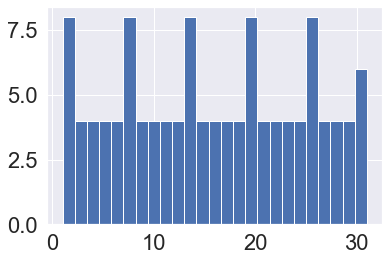

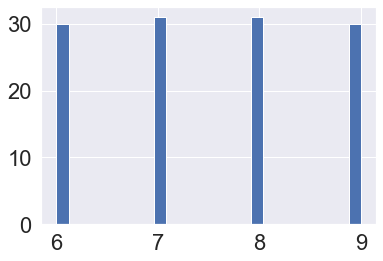

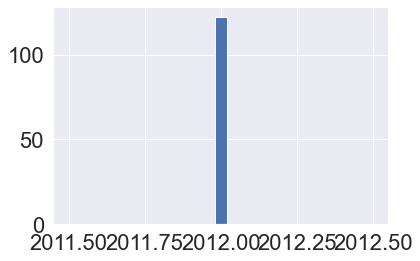

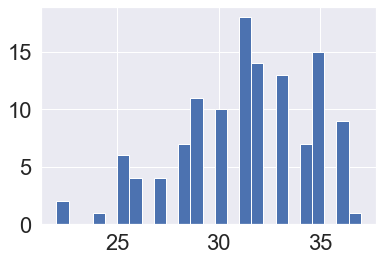

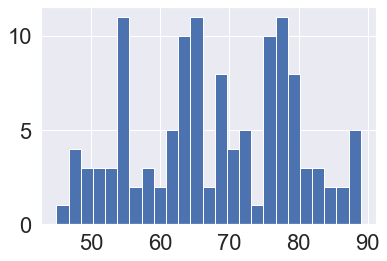

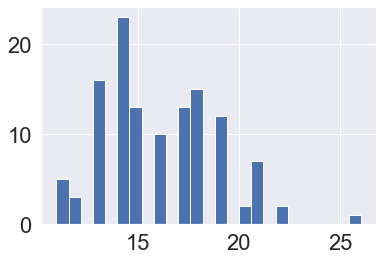

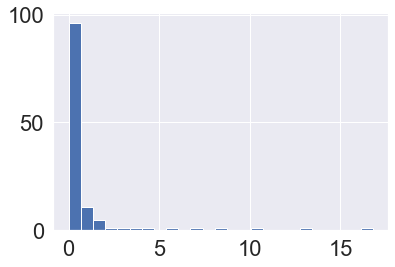

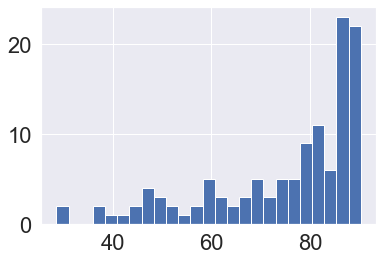

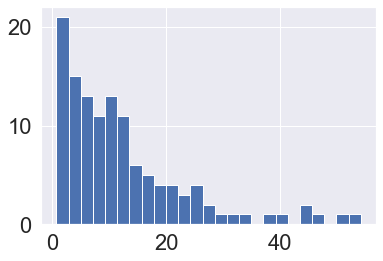

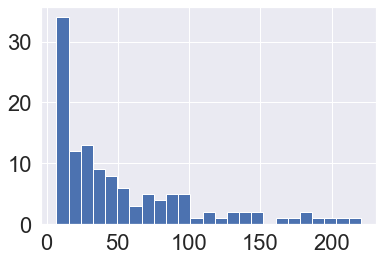

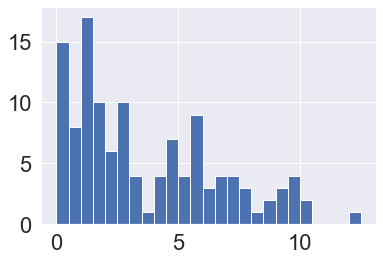

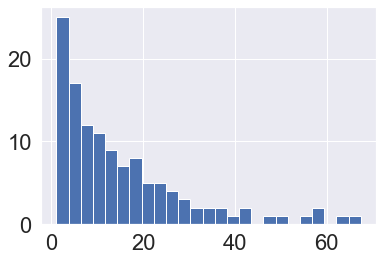

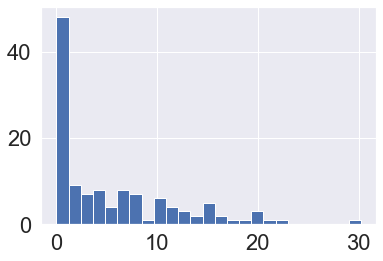

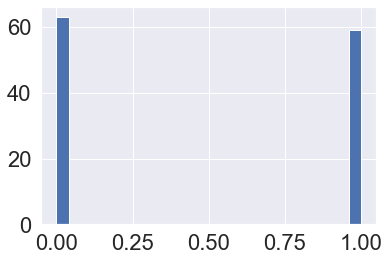

In [188]:
for feature in df1:
    data=df1.copy()
    data[feature].hist(bins=25)
    plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

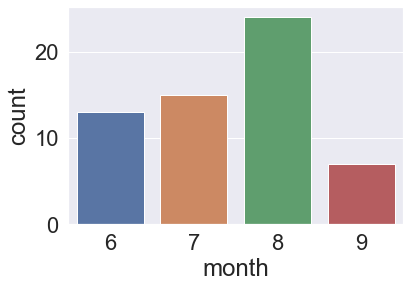

In [189]:
sns.countplot(x="month",data=df1.loc[df1["classes"]==1])      # region 1

<AxesSubplot:xlabel='month', ylabel='count'>

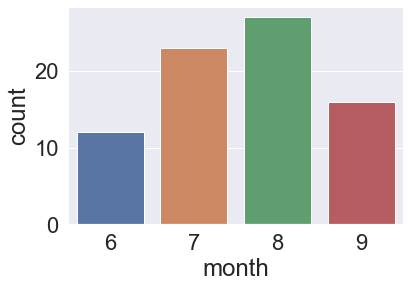

In [190]:
sns.countplot(x="month",data=df2.loc[df2["classes"]==1])       # region 2

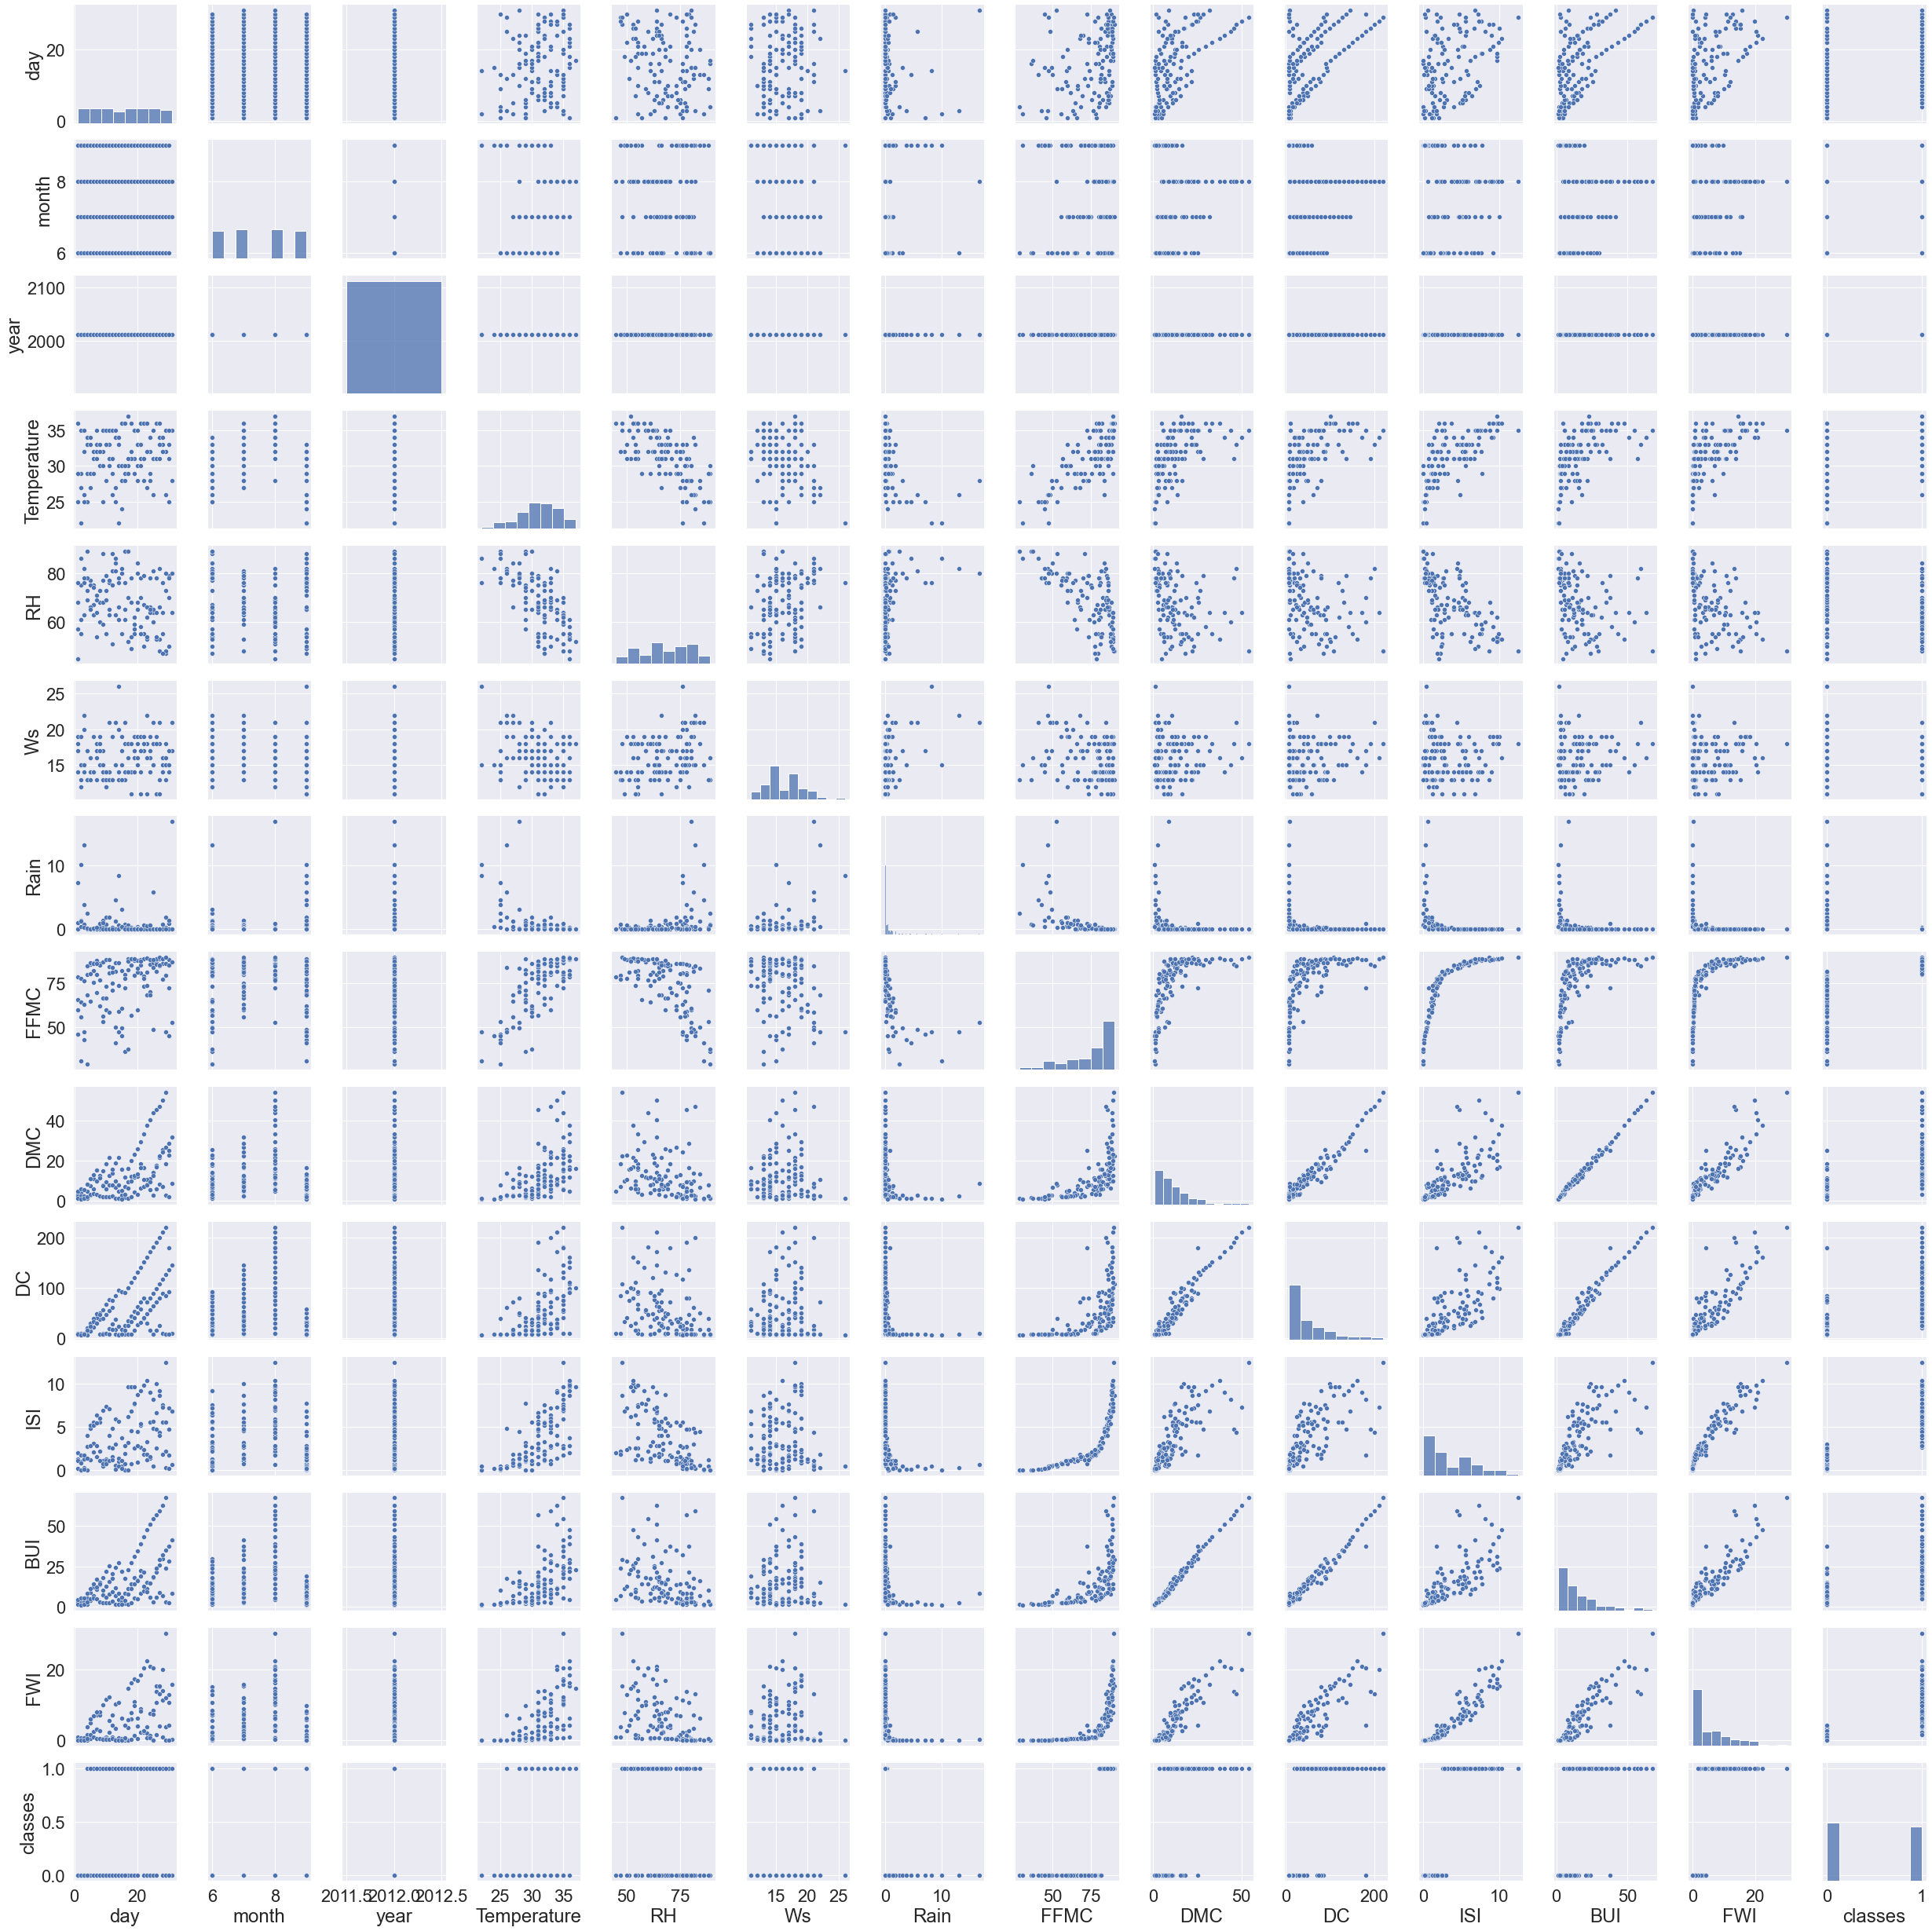

In [191]:
sns.pairplot(df1)

<AxesSubplot:title={'center':'Behaviour of temp, humidity,wind,rain @ fire'}>

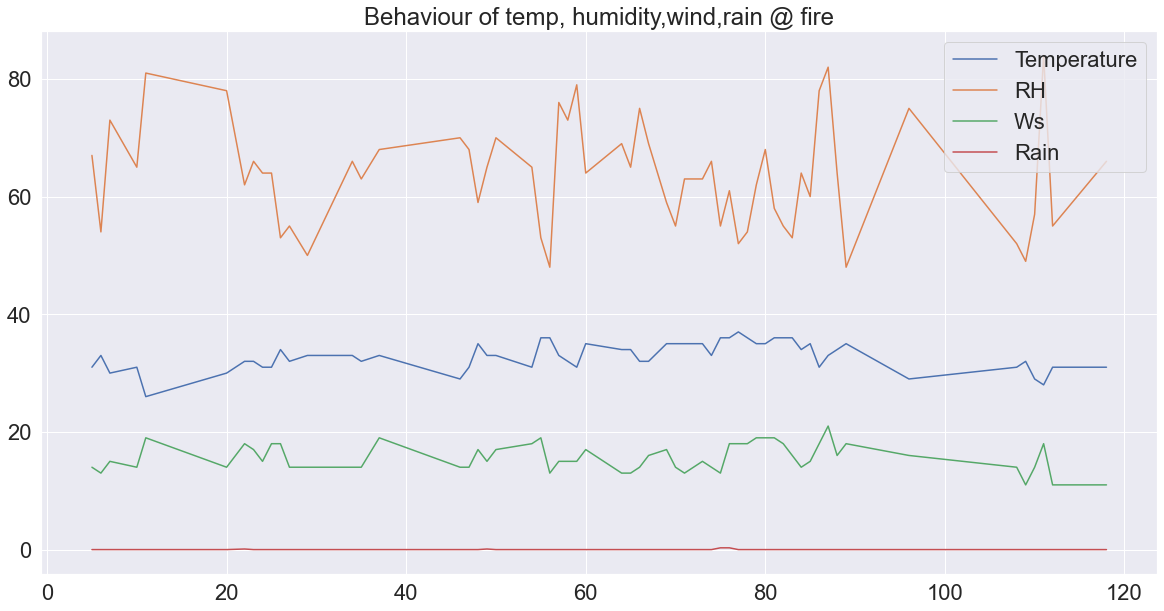

In [192]:
fire=df1[df1['classes']==1]
fire=fire.iloc[:,3:7]
fire.plot(figsize=(20,10),title='Behaviour of temp, humidity,wind,rain @ fire')

In [213]:
df1=df1.drop(['day','month','year'],axis=1)

In [214]:
df2=df2.drop(['day','month','year'],axis=1)

KeyError: "['day' 'month' 'year'] not found in axis"

<AxesSubplot:xlabel='classes', ylabel='Temperature'>

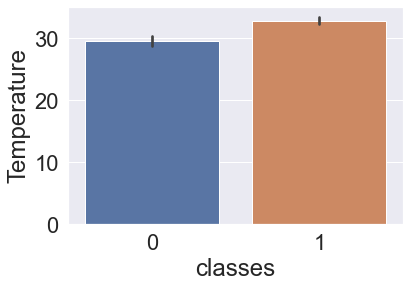

In [195]:
sns.barplot(x = 'classes',y = 'Temperature', data = df1)

<AxesSubplot:xlabel='classes', ylabel='RH'>

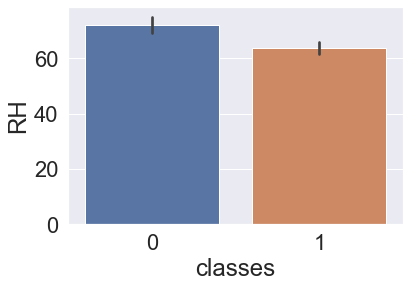

In [196]:
sns.barplot(x = 'classes',y = 'RH', data = df1)

<AxesSubplot:xlabel='classes', ylabel='Ws'>

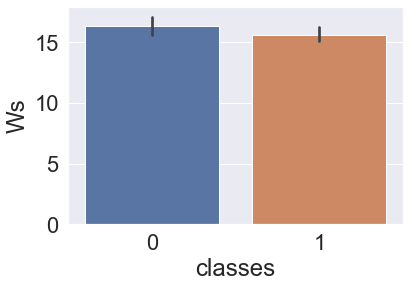

In [197]:
sns.barplot(x = 'classes',y = 'Ws', data = df1)

In [215]:
x= df1[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']]

In [216]:
#VIF variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x= df1[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']]
y=df1[["classes"]]
X = sm.add_constant(x)

C:\Users\pbann\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [217]:
vif_data["feature"] = x.columns

ValueError: Length of values (10) does not match length of index (6)

In [218]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
                           

ValueError: Length of values (10) does not match length of index (6)

In [219]:
vif_data

,feature,VIF
0,Temperature,116.982578
1,RH,37.552575
2,Ws,37.834091
3,Rain,1.761739
4,FFMC,79.662442
5,FWI,3.269432


In [220]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,0.497810
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,-0.377328
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,-0.121408
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,-0.334392
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,0.743637
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,0.616951
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,0.588464
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062,0.831796
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417,0.612576
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000,0.759758


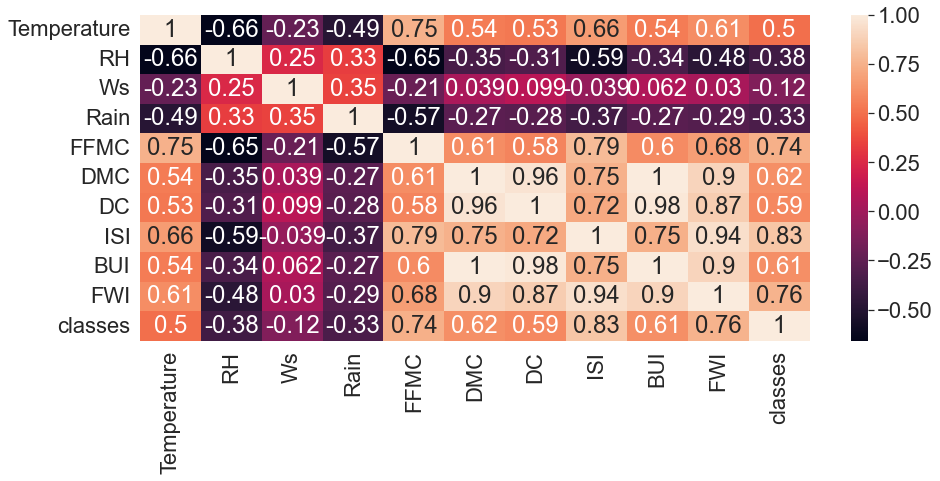

In [159]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [222]:
df1.drop(['DMC','BUI'],axis=1,inplace=True)

In [223]:
df1.drop(['ISI'],axis=1,inplace=True)

In [224]:
df1.drop(['DC'],axis=1,inplace=True)

In [180]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,FWI,classes
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.608367,0.497810
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.476067,-0.377328
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.029637,-0.121408
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.292914,-0.334392
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.675553,0.743637
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,1.000000,0.759758
classes,0.497810,-0.377328,-0.121408,-0.334392,0.743637,0.759758,1.000000


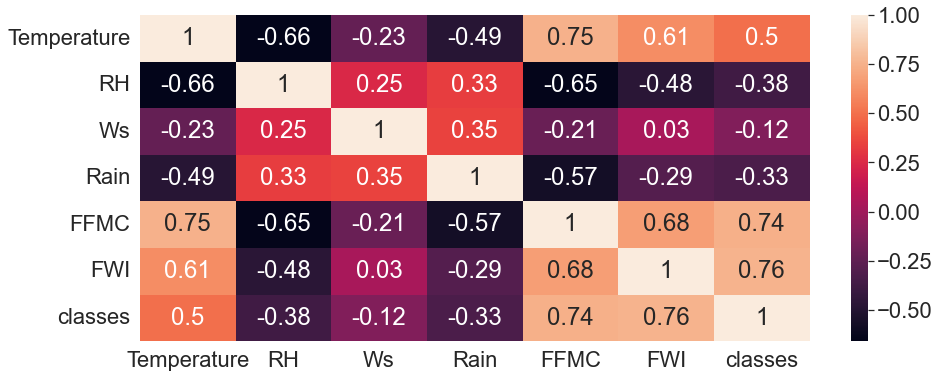

In [181]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [183]:
#VIF variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1[['Temperature','RH','Ws','Rain','FFMC','FWI']]
y=df1[["classes"]]
X = sm.add_constant(x)

C:\Users\pbann\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [184]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]

In [185]:
vif_data

,feature,VIF
0,Temperature,116.982578
1,RH,37.552575
2,Ws,37.834091
3,Rain,1.761739
4,FFMC,79.662442
5,FWI,3.269432


In [225]:
df1

,Temperature,RH,Ws,Rain,FFMC,FWI,classes
0,29,57,18,0.0,65.7,0.5,0
1,29,61,13,1.3,64.4,0.4,0
2,26,82,22,13.1,47.1,0.1,0
3,25,89,13,2.5,28.6,0.0,0
4,27,77,16,0.0,64.8,0.5,0
...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,1.7,0
118,31,66,11,0.0,85.7,4.1,1
119,32,47,14,0.7,77.5,0.9,0
120,26,80,16,1.8,47.4,0.1,0


In [227]:
df1.to_csv('final_df1.csv')

In [247]:
x=df1.iloc[:,0:6]
y=df1.iloc[:,-1]

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import pickle

In [251]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [252]:
###RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rendomreg= RandomForestRegressor()
rendomreg.fit(x_train,y_train)

RandomForestRegressor()

In [253]:
predction_rendom=rendomreg.predict(x_test)

In [255]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,predction_rendom)
print (r1)

0.9593865497076024


In [262]:
import pickle
pickle.dump(rendomreg,open('model1.pkl',"wb"))

In [263]:
pickle_model=pickle.load(open('model1.pkl',"rb"))
pickle_model.predict(x_test)

array([1.  , 0.  , 1.  , 0.98, 0.  , 0.  , 0.64, 1.  , 0.14, 0.23, 1.  ,
       0.91, 0.12, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.65, 0.95, 0.  , 0.86, 1.  , 1.  , 0.93, 0.  , 1.  ,
       0.  , 0.03, 0.  , 1.  ])